In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

In [7]:
guests_by_hotel_type_by_region_df = pd.read_csv('Datasets\\Tourism\\Guests_by_Hotel_Type_by_Region.csv')
hotel_establishments_and_rooms_by_rating_type_df = pd.read_csv('Datasets\\Tourism\\Hotel_Establishments_and_Rooms_by_Rating_Type.csv')
hotel_establishments_main_indicators_df = pd.read_csv('Datasets\\Tourism\\Hotel_Establishments_Main_Indicators.csv')

# Guests by Hotel Type by Region

## Data Understanding

In [8]:
guests_by_hotel_type_by_region_df.head()

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS,OBS_STATUS,OBS_COMMENT,UNIT_MULT
0,FCSA:DF_GUEST_REGION(4.3.0),H,NUMBER,AE,A,_Z,GHH,OC,FCSC,2015,399751,NaN,NaN,NaN,NaN
1,FCSA:DF_GUEST_REGION(4.3.0),H,NUMBER,AE,A,_Z,GHH,OC,FCSC,2016,380717,NaN,NaN,NaN,NaN
2,FCSA:DF_GUEST_REGION(4.3.0),H,NUMBER,AE,A,_Z,GHH,OC,FCSC,2017,397131,NaN,NaN,NaN,NaN
3,FCSA:DF_GUEST_REGION(4.3.0),H,NUMBER,AE,A,_Z,GHH,OC,FCSC,2018,358474,NaN,NaN,NaN,NaN
4,FCSA:DF_GUEST_REGION(4.3.0),H,NUMBER,AE,A,_Z,GHH,OC,FCSC,2019,351920,NaN,NaN,NaN,NaN


In [9]:
guests_by_hotel_type_by_region_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATAFLOW       664 non-null    object 
 1   MEASURE        664 non-null    object 
 2   UNIT_MEASURE   664 non-null    object 
 3   REF_AREA       664 non-null    object 
 4   FREQ           664 non-null    object 
 5   H_TYPE         664 non-null    object 
 6   H_INDICATOR    664 non-null    object 
 7   GUEST_REGION   664 non-null    object 
 8   SOURCE_DETAIL  664 non-null    object 
 9   TIME_PERIOD    664 non-null    int64  
 10  OBS_VALUE      664 non-null    int64  
 11  DECIMALS       0 non-null      float64
 12  OBS_STATUS     0 non-null      float64
 13  OBS_COMMENT    0 non-null      float64
 14  UNIT_MULT      0 non-null      float64
dtypes: float64(4), int64(2), object(9)
memory usage: 77.9+ KB


In [10]:
for column in guests_by_hotel_type_by_region_df.columns:
    unique_values = guests_by_hotel_type_by_region_df[column].nunique()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      1
MEASURE                       1
UNIT_MEASURE                  1
REF_AREA                      1
FREQ                          1
H_TYPE                        1
H_INDICATOR                   3
GUEST_REGION                  11
SOURCE_DETAIL                 1
TIME_PERIOD                   40
OBS_VALUE                     662
DECIMALS                      0
OBS_STATUS                    0
OBS_COMMENT                   0
UNIT_MULT                     0


In [11]:
for column in guests_by_hotel_type_by_region_df.columns:
    unique_values = guests_by_hotel_type_by_region_df[column].value_counts()
    print("{:<30}{}".format(column, unique_values))


DATAFLOW                      DATAFLOW
FCSA:DF_GUEST_REGION(4.3.0)    664
Name: count, dtype: int64
MEASURE                       MEASURE
H    664
Name: count, dtype: int64
UNIT_MEASURE                  UNIT_MEASURE
NUMBER    664
Name: count, dtype: int64
REF_AREA                      REF_AREA
AE    664
Name: count, dtype: int64
FREQ                          FREQ
A    664
Name: count, dtype: int64
H_TYPE                        H_TYPE
_Z    664
Name: count, dtype: int64
H_INDICATOR                   H_INDICATOR
GUN    332
GHA    252
GHH     80
Name: count, dtype: int64
GUEST_REGION                  GUEST_REGION
AC      80
_T      80
EC      80
AM      80
OC      72
GCC     72
UAE     68
ACAF    54
OTH     34
ASC     26
AF      18
Name: count, dtype: int64
SOURCE_DETAIL                 SOURCE_DETAIL
FCSC    664
Name: count, dtype: int64
TIME_PERIOD                   TIME_PERIOD
2015    20
2017    20
2018    20
2019    20
2020    20
2021    20
2022    20
2016    20
2013    20
2010    18
2

In [12]:
guests_by_hotel_type_by_region_df.duplicated().sum()

0

In [13]:
guests_by_hotel_type_by_region_df.isnull().sum()

DATAFLOW           0
MEASURE            0
UNIT_MEASURE       0
REF_AREA           0
FREQ               0
H_TYPE             0
H_INDICATOR        0
GUEST_REGION       0
SOURCE_DETAIL      0
TIME_PERIOD        0
OBS_VALUE          0
DECIMALS         664
OBS_STATUS       664
OBS_COMMENT      664
UNIT_MULT        664
dtype: int64

array([[<Axes: title={'center': 'TIME_PERIOD'}>,
        <Axes: title={'center': 'OBS_VALUE'}>],
       [<Axes: title={'center': 'DECIMALS'}>,
        <Axes: title={'center': 'OBS_STATUS'}>],
       [<Axes: title={'center': 'OBS_COMMENT'}>,
        <Axes: title={'center': 'UNIT_MULT'}>]], dtype=object)

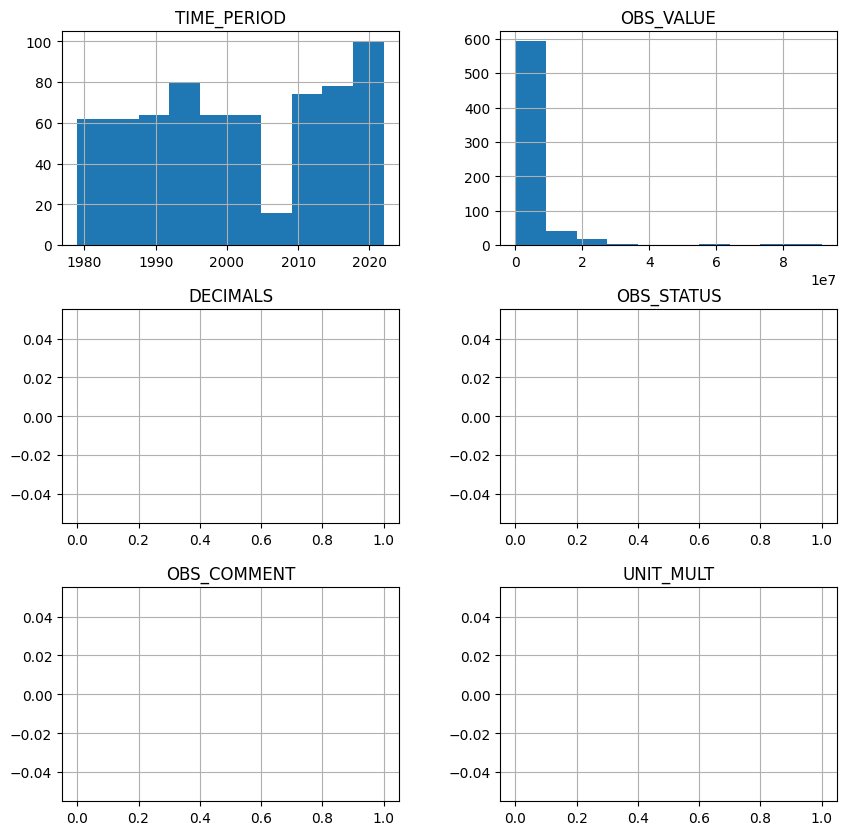

In [14]:
guests_by_hotel_type_by_region_df.hist(figsize=(10, 10))

## Data Cleaning

In [15]:
guests_by_hotel_type_by_region_df.drop(columns=['DECIMALS', 'OBS_STATUS', 'OBS_COMMENT', 'UNIT_MULT'], inplace = True)

In [16]:
guests_by_hotel_type_by_region_df.rename(columns={'H_INDICATOR': 'Hotel Indicator', 'GUEST_REGION': 'Guest Region','TIME_PERIOD': 'Time Period','OBS_VALUE': 'Value'}, inplace=True)

In [17]:
guests_by_hotel_type_by_region_df['Hotel Indicator'] = guests_by_hotel_type_by_region_df['Hotel Indicator'].replace(['GHH'], 'Guest Arrival')
guests_by_hotel_type_by_region_df['Hotel Indicator'] = guests_by_hotel_type_by_region_df['Hotel Indicator'].replace(['GUN'], 'Guest Nights')
guests_by_hotel_type_by_region_df['Hotel Indicator'] = guests_by_hotel_type_by_region_df['Hotel Indicator'].replace(['GHA'], 'Guests - Hotels')

In [18]:
guests_by_hotel_type_by_region_df['Guest Region'] = guests_by_hotel_type_by_region_df['Guest Region'].replace(['AC'], 'Arab Countries')
guests_by_hotel_type_by_region_df['Guest Region'] = guests_by_hotel_type_by_region_df['Guest Region'].replace(['ASC'], 'Asian Countries')
guests_by_hotel_type_by_region_df['Guest Region'] = guests_by_hotel_type_by_region_df['Guest Region'].replace(['EC'], 'European Countries')
guests_by_hotel_type_by_region_df['Guest Region'] = guests_by_hotel_type_by_region_df['Guest Region'].replace(['AM'], 'American Countries')
guests_by_hotel_type_by_region_df['Guest Region'] = guests_by_hotel_type_by_region_df['Guest Region'].replace(['AF'], 'African Countries')
guests_by_hotel_type_by_region_df['Guest Region'] = guests_by_hotel_type_by_region_df['Guest Region'].replace(['OC'], 'Oceania')
guests_by_hotel_type_by_region_df['Guest Region'] = guests_by_hotel_type_by_region_df['Guest Region'].replace(['OTH'], 'Other')
guests_by_hotel_type_by_region_df['Guest Region'] = guests_by_hotel_type_by_region_df['Guest Region'].replace(['ACAF'], 'Asian and African Countries')
guests_by_hotel_type_by_region_df['Guest Region'] = guests_by_hotel_type_by_region_df['Guest Region'].replace(['_T'], 'Total')


In [19]:
guests_by_hotel_type_by_region_df = guests_by_hotel_type_by_region_df[guests_by_hotel_type_by_region_df['Guest Region'] == 'UAE']

In [20]:
cols_to_drop = [col for col in guests_by_hotel_type_by_region_df.columns if guests_by_hotel_type_by_region_df[col].nunique() == 1]
guests_by_hotel_type_by_region_df = guests_by_hotel_type_by_region_df.drop(columns=cols_to_drop)

In [54]:
guests_by_hotel_type_by_region_df_pivot = guests_by_hotel_type_by_region_df.pivot(index='Time Period', columns='Hotel Indicator', values='Value').reset_index()

In [ ]:
guests_by_hotel_type_by_region_df_pivot.fillna(0, inplace=True)

Hotel Indicator,Time Period,Guest Arrival,Guest Nights,Guests - Hotels
0,1985,0.0,115570.0,65971.0
1,1986,0.0,133258.0,83349.0
2,1987,0.0,158670.0,102272.0
3,1988,0.0,189268.0,112932.0
4,1989,0.0,204978.0,117171.0
5,1990,0.0,212431.0,125231.0
6,1991,0.0,231281.0,138832.0
7,1992,0.0,262192.0,156635.0
8,1993,0.0,273109.0,160004.0
9,1994,0.0,322778.0,182037.0


In [57]:
guests_by_hotel_type_by_region_df_pivot.to_csv('Cleaned Datasets\\Tourism\\Guests_by_Hotel_Type_by_Region_Pivoted.csv', index=False)

In [21]:
# guests_by_hotel_type_by_region_df.to_csv('Cleaned Datasets\\Tourism\\Guests_by_Hotel_Type_by_Region.csv', index=False)

## Data Visualization

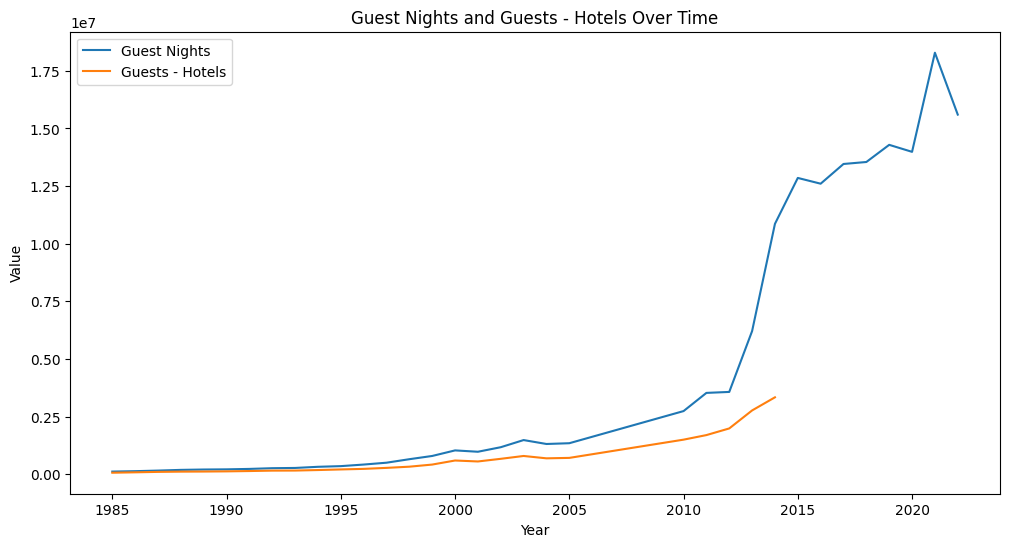

In [22]:
# Filter data for Guest Nights and Guests - Hotels
guest_nights_df = guests_by_hotel_type_by_region_df[guests_by_hotel_type_by_region_df['Hotel Indicator'] == 'Guest Nights']
guests_hotels_df = guests_by_hotel_type_by_region_df[guests_by_hotel_type_by_region_df['Hotel Indicator'] == 'Guests - Hotels']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(guest_nights_df['Time Period'], guest_nights_df['Value'], label='Guest Nights')
plt.plot(guests_hotels_df['Time Period'], guests_hotels_df['Value'], label='Guests - Hotels')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Guest Nights and Guests - Hotels Over Time')
plt.legend()
plt.show()

# Hotel Establishments and Rooms by Rating Type

## Data Understanding

In [23]:
hotel_establishments_and_rooms_by_rating_type_df.head()

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS,OBS_STATUS,OBS_COMMENT,UNIT_MULT
0,FCSA:DF_HOT_TYPE(4.3.0),H,NUMBER,AE,A,_T,EST,_Z,FCSC,2014,1027,NaN,NaN,NaN,NaN
1,FCSA:DF_HOT_TYPE(4.3.0),H,NUMBER,AE,A,_T,EST,_Z,FCSC,2015,1056,NaN,NaN,NaN,NaN
2,FCSA:DF_HOT_TYPE(4.3.0),H,NUMBER,AE,A,_T,EST,_Z,FCSC,2016,1060,NaN,NaN,NaN,NaN
3,FCSA:DF_HOT_TYPE(4.3.0),H,NUMBER,AE,A,_T,EST,_Z,FCSC,2017,1058,NaN,NaN,NaN,NaN
4,FCSA:DF_HOT_TYPE(4.3.0),H,NUMBER,AE,A,_T,EST,_Z,FCSC,2018,1106,NaN,NaN,NaN,NaN


In [24]:
hotel_establishments_and_rooms_by_rating_type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATAFLOW       400 non-null    object 
 1   MEASURE        400 non-null    object 
 2   UNIT_MEASURE   400 non-null    object 
 3   REF_AREA       400 non-null    object 
 4   FREQ           400 non-null    object 
 5   H_TYPE         400 non-null    object 
 6   H_INDICATOR    400 non-null    object 
 7   GUEST_REGION   400 non-null    object 
 8   SOURCE_DETAIL  400 non-null    object 
 9   TIME_PERIOD    400 non-null    int64  
 10  OBS_VALUE      400 non-null    int64  
 11  DECIMALS       0 non-null      float64
 12  OBS_STATUS     0 non-null      float64
 13  OBS_COMMENT    0 non-null      float64
 14  UNIT_MULT      0 non-null      float64
dtypes: float64(4), int64(2), object(9)
memory usage: 47.0+ KB


In [25]:
for column in hotel_establishments_and_rooms_by_rating_type_df.columns:
    unique_values = hotel_establishments_and_rooms_by_rating_type_df[column].nunique()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      1
MEASURE                       1
UNIT_MEASURE                  1
REF_AREA                      1
FREQ                          1
H_TYPE                        11
H_INDICATOR                   2
GUEST_REGION                  1
SOURCE_DETAIL                 1
TIME_PERIOD                   44
OBS_VALUE                     336
DECIMALS                      0
OBS_STATUS                    0
OBS_COMMENT                   0
UNIT_MULT                     0


In [26]:
for column in hotel_establishments_and_rooms_by_rating_type_df.columns:
    unique_values = hotel_establishments_and_rooms_by_rating_type_df[column].value_counts()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      DATAFLOW
FCSA:DF_HOT_TYPE(4.3.0)    400
Name: count, dtype: int64
MEASURE                       MEASURE
H    400
Name: count, dtype: int64
UNIT_MEASURE                  UNIT_MEASURE
NUMBER    400
Name: count, dtype: int64
REF_AREA                      REF_AREA
AE    400
Name: count, dtype: int64
FREQ                          FREQ
A    400
Name: count, dtype: int64
H_TYPE                        H_TYPE
HOT        88
1CLASS     60
2CLASS     60
3CLASS     56
123STAR    24
4STAR      24
5STAR      24
_T         18
HTAP       18
STA        14
DELSUP     14
Name: count, dtype: int64
H_INDICATOR                   H_INDICATOR
EST     200
ROOM    200
Name: count, dtype: int64
GUEST_REGION                  GUEST_REGION
_Z    400
Name: count, dtype: int64
SOURCE_DETAIL                 SOURCE_DETAIL
FCSC    400
Name: count, dtype: int64
TIME_PERIOD                   TIME_PERIOD
2016    16
2017    16
2019    16
2020    16
2021    16
2022    16
2015    16
2018    12
198

In [27]:
hotel_establishments_and_rooms_by_rating_type_df.duplicated().sum()

0

In [28]:
hotel_establishments_and_rooms_by_rating_type_df.isnull().sum()

DATAFLOW           0
MEASURE            0
UNIT_MEASURE       0
REF_AREA           0
FREQ               0
H_TYPE             0
H_INDICATOR        0
GUEST_REGION       0
SOURCE_DETAIL      0
TIME_PERIOD        0
OBS_VALUE          0
DECIMALS         400
OBS_STATUS       400
OBS_COMMENT      400
UNIT_MULT        400
dtype: int64

## Data Cleaning

In [29]:
hotel_establishments_and_rooms_by_rating_type_df.drop(columns=['DECIMALS', 'OBS_STATUS', 'OBS_COMMENT', 'UNIT_MULT'], inplace = True)

In [30]:
cols_to_drop = [col for col in hotel_establishments_and_rooms_by_rating_type_df.columns if hotel_establishments_and_rooms_by_rating_type_df[col].nunique() == 1]
hotel_establishments_and_rooms_by_rating_type_df = hotel_establishments_and_rooms_by_rating_type_df.drop(columns=cols_to_drop)

In [31]:
hotel_establishments_and_rooms_by_rating_type_df.rename(columns={'H_TYPE':'Hotel Type','H_INDICATOR': 'Hotel Indicator','TIME_PERIOD': 'Time Period','OBS_VALUE': 'Value'}, inplace=True)

In [32]:
hotel_establishments_and_rooms_by_rating_type_df['Hotel Type'] = hotel_establishments_and_rooms_by_rating_type_df['Hotel Type'].replace(['_T'], 'Total Hotels and Hotel Apartments')
hotel_establishments_and_rooms_by_rating_type_df['Hotel Type'] = hotel_establishments_and_rooms_by_rating_type_df['Hotel Type'].replace(['HOT'], 'Total Hotels')
hotel_establishments_and_rooms_by_rating_type_df['Hotel Type'] = hotel_establishments_and_rooms_by_rating_type_df['Hotel Type'].replace(['5STAR'], '5 Star')
hotel_establishments_and_rooms_by_rating_type_df['Hotel Type'] = hotel_establishments_and_rooms_by_rating_type_df['Hotel Type'].replace(['4STAR'], '4 Star')
hotel_establishments_and_rooms_by_rating_type_df['Hotel Type'] = hotel_establishments_and_rooms_by_rating_type_df['Hotel Type'].replace(['123STAR'], '1-3 Star')
hotel_establishments_and_rooms_by_rating_type_df['Hotel Type'] = hotel_establishments_and_rooms_by_rating_type_df['Hotel Type'].replace(['HTAP'], 'Total Hotel Apartments')
hotel_establishments_and_rooms_by_rating_type_df['Hotel Type'] = hotel_establishments_and_rooms_by_rating_type_df['Hotel Type'].replace(['DELSUP'], 'Deluxe - Superior')
hotel_establishments_and_rooms_by_rating_type_df['Hotel Type'] = hotel_establishments_and_rooms_by_rating_type_df['Hotel Type'].replace(['STA'], 'Standard')

In [33]:
hotel_establishments_and_rooms_by_rating_type_df['Hotel Indicator'] = hotel_establishments_and_rooms_by_rating_type_df['Hotel Indicator'].replace(['ROOM'], 'Rooms')
hotel_establishments_and_rooms_by_rating_type_df['Hotel Indicator'] = hotel_establishments_and_rooms_by_rating_type_df['Hotel Indicator'].replace(['EST'], 'Hotel Establishments')

In [82]:
hotel_establishments_and_rooms_by_rating_type_df_pivot = hotel_establishments_and_rooms_by_rating_type_df.pivot_table(
    index=['Time Period','Hotel Indicator'], 
    columns='Hotel Type', 
    values='Value'
).reset_index()


In [83]:
hotel_establishments_and_rooms_by_rating_type_df_pivot.fillna(0, inplace=True)

In [84]:
hotel_establishments_and_rooms_by_rating_type_df_pivot

Hotel Type,Time Period,Hotel Indicator,1-3 Star,1CLASS,2CLASS,3CLASS,4 Star,5 Star,Deluxe - Superior,Standard,Total Hotel Apartments,Total Hotels,Total Hotels and Hotel Apartments
0,1975,Hotel Establishments,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0
1,1975,Rooms,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1743.0,0.0
2,1976,Hotel Establishments,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0
3,1976,Rooms,0.0,1418.0,469.0,0.0,0.0,0.0,0.0,0.0,0.0,1887.0,0.0
4,1977,Hotel Establishments,0.0,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2020,Rooms,30365.0,0.0,0.0,0.0,47874.0,66125.0,19269.0,16624.0,35893.0,144364.0,180257.0
84,2021,Hotel Establishments,339.0,0.0,0.0,0.0,258.0,235.0,149.0,163.0,312.0,832.0,1144.0
85,2021,Rooms,34184.0,0.0,0.0,0.0,54294.0,70465.0,20173.0,14797.0,34970.0,158943.0,193913.0
86,2022,Hotel Establishments,367.0,0.0,0.0,0.0,269.0,245.0,153.0,171.0,324.0,881.0,1205.0


In [85]:
hotel_establishments_and_rooms_by_rating_type_df_pivot.to_csv('Cleaned Datasets\\Tourism\\Hotel_Establishments_and_Rooms_by_Rating_Type_Pivoted.csv', index=False)

In [34]:
# hotel_establishments_and_rooms_by_rating_type_df.to_csv('Cleaned Datasets\\Tourism\\Hotel_Establishments_and_Rooms_by_Rating_Type.csv', index=False)

## Data Visualisation

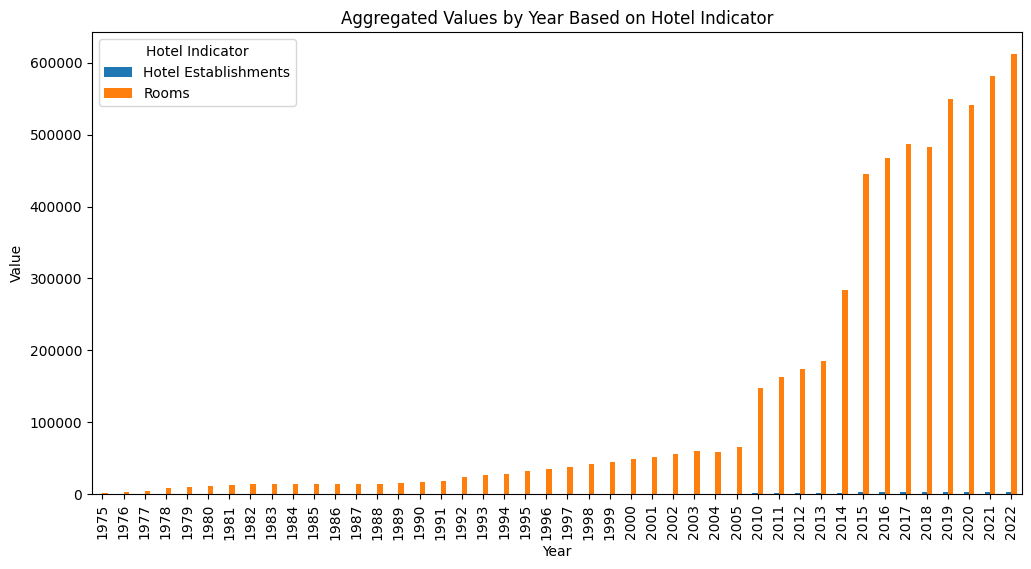

In [35]:
# Aggregate the values by year and hotel indicator
aggregated_df = hotel_establishments_and_rooms_by_rating_type_df.groupby(['Time Period', 'Hotel Indicator'])['Value'].sum().unstack()

# Plot the data
plt.figure(figsize=(12, 6))
aggregated_df.plot(kind='bar', ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Aggregated Values by Year Based on Hotel Indicator')
plt.legend(title='Hotel Indicator')
plt.show()


# Hotel Establishments Main Indicators

## Data Understanding

In [36]:
hotel_establishments_main_indicators_df.head()

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS,OBS_STATUS,OBS_COMMENT,UNIT_MULT
0,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1985,318484.0,NaN,NaN,NaN,NaN
1,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1986,298504.0,NaN,NaN,NaN,NaN
2,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1987,314926.0,NaN,NaN,NaN,NaN
3,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1988,345023.0,NaN,NaN,NaN,NaN
4,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1989,425776.0,NaN,NaN,NaN,NaN


In [37]:
hotel_establishments_main_indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATAFLOW       201 non-null    object 
 1   MEASURE        201 non-null    object 
 2   UNIT_MEASURE   201 non-null    object 
 3   REF_AREA       201 non-null    object 
 4   FREQ           201 non-null    object 
 5   H_TYPE         201 non-null    object 
 6   H_INDICATOR    201 non-null    object 
 7   GUEST_REGION   201 non-null    object 
 8   SOURCE_DETAIL  201 non-null    object 
 9   TIME_PERIOD    201 non-null    int64  
 10  OBS_VALUE      201 non-null    float64
 11  DECIMALS       36 non-null     float64
 12  OBS_STATUS     0 non-null      float64
 13  OBS_COMMENT    0 non-null      float64
 14  UNIT_MULT      0 non-null      float64
dtypes: float64(5), int64(1), object(9)
memory usage: 23.7+ KB


In [38]:
for column in hotel_establishments_main_indicators_df.columns:
    unique_values = hotel_establishments_main_indicators_df[column].nunique()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      1
MEASURE                       1
UNIT_MEASURE                  2
REF_AREA                      1
FREQ                          1
H_TYPE                        1
H_INDICATOR                   10
GUEST_REGION                  1
SOURCE_DETAIL                 1
TIME_PERIOD                   41
OBS_VALUE                     171
DECIMALS                      2
OBS_STATUS                    0
OBS_COMMENT                   0
UNIT_MULT                     0


In [39]:
for column in hotel_establishments_main_indicators_df.columns:
    unique_values = hotel_establishments_main_indicators_df[column].value_counts()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      DATAFLOW
FCSA:DF_HOT_INDICATOR(4.3.0)    201
Name: count, dtype: int64
MEASURE                       MEASURE
H    201
Name: count, dtype: int64
UNIT_MEASURE                  UNIT_MEASURE
AED       110
NUMBER     91
Name: count, dtype: int64
REF_AREA                      REF_AREA
AE    201
Name: count, dtype: int64
FREQ                          FREQ
A    201
Name: count, dtype: int64
H_TYPE                        H_TYPE
_Z    201
Name: count, dtype: int64
H_INDICATOR                   H_INDICATOR
GUN    41
LS     34
RR     31
OR     31
TR     31
FB      9
AR      8
ARR     8
TOR     4
TAR     4
Name: count, dtype: int64
GUEST_REGION                  GUEST_REGION
_Z    201
Name: count, dtype: int64
SOURCE_DETAIL                 SOURCE_DETAIL
FCSC    201
Name: count, dtype: int64
TIME_PERIOD                   TIME_PERIOD
2022    10
2021    10
2020    10
2019    10
2018     8
2017     8
2016     8
2015     8
2013     6
1985     5
2001     5
2014     5
1986    

In [40]:
hotel_establishments_main_indicators_df.duplicated().sum()

0

In [41]:
hotel_establishments_main_indicators_df.isnull().sum()

DATAFLOW           0
MEASURE            0
UNIT_MEASURE       0
REF_AREA           0
FREQ               0
H_TYPE             0
H_INDICATOR        0
GUEST_REGION       0
SOURCE_DETAIL      0
TIME_PERIOD        0
OBS_VALUE          0
DECIMALS         165
OBS_STATUS       201
OBS_COMMENT      201
UNIT_MULT        201
dtype: int64

## Data Cleaning

In [42]:
hotel_establishments_main_indicators_df.drop(columns=['DECIMALS', 'OBS_STATUS', 'OBS_COMMENT', 'UNIT_MULT'], inplace = True)

In [43]:
cols_to_drop = [col for col in hotel_establishments_main_indicators_df.columns if hotel_establishments_main_indicators_df[col].nunique() == 1]
hotel_establishments_main_indicators_df = hotel_establishments_main_indicators_df.drop(columns=cols_to_drop)

In [44]:
hotel_establishments_main_indicators_df.rename(columns={'UNIT_MEASURE': 'Unit of Measure', 'H_INDICATOR': 'Hotel Indicator','TIME_PERIOD': 'Time Period','OBS_VALUE': 'Value'}, inplace=True)

In [45]:
hotel_establishments_main_indicators_df['Hotel Indicator'] = hotel_establishments_main_indicators_df['Hotel Indicator'].replace({
    'GUN': 'Guest Nights',
    'LS': 'Length of Stay (average)',
    'AR': 'Rooms (No.)',
    'TAR': 'Total Available Rooms',
    'TOR': 'Total Occupied Rooms',
    'TR': 'Total Revenue',
    'RR': 'Room Revenue',
    'FB': 'Food and Beverage Revenue',
    'OR': 'Other Revenue',
    'ARR': 'Average Room Rate'
})

In [46]:
from io import StringIO
import pandas as pd
# Read the data into a DataFrame
df = pd.read_csv(StringIO('Cleaned Datasets\\Tourism\\Hotel_Establishments_Main_Indicators.csv'))


In [52]:
hotel_establishments_main_indicators_pivot = hotel_establishments_main_indicators_df.pivot(index='Time Period', columns='Hotel Indicator', values='Value').reset_index()


In [58]:
hotel_establishments_main_indicators_pivot.fillna(0, inplace=True)

In [59]:
hotel_establishments_main_indicators_pivot.to_csv('Cleaned Datasets\\Tourism\\Hotel_Establishments_Main_Indicators_Pivoted.csv', index=False)

In [48]:
# hotel_establishments_main_indicators_df.to_csv('Cleaned Datasets\\Tourism\\Hotel_Establishments_Main_Indicators.csv', index=False)

## Data Visualisation

# Pumping data into Mongodb

In [49]:
# from pymongo import MongoClient
# from dotenv import load_dotenv
# import os

# # Connect to MongoDB
# load_dotenv()

# client = MongoClient(os.environ['MONGODB_URI_1'])  # Uses the connection string from your .env file
# db = client['tourism_db']

# # Convert DataFrame to dictionary
# guests_by_hotel_type_by_region_dict = guests_by_hotel_type_by_region_df.to_dict('records')
# hotel_establishments_and_rooms_by_rating_type_dict = hotel_establishments_and_rooms_by_rating_type_df.to_dict('records')
# hotel_establishments_main_indicators_dict = hotel_establishments_main_indicators_df.to_dict('records')

# # Insert into MongoDB collections
# db['guests_by_hotel_type_by_region'].insert_many(guests_by_hotel_type_by_region_dict)
# db['hotel_establishments_and_rooms_by_rating_type'].insert_many(hotel_establishments_and_rooms_by_rating_type_dict)
# db['hotel_establishments_main_indicators'].insert_many(hotel_establishments_main_indicators_dict)

# print("Data pumped into MongoDB successfully!")

In [50]:
from datetime import datetime

# Competition based pricing
# demand score = demand elasticity
def competition_pricing(base_price, demand_score, competitor_price):
    # Clamp demand_score (elasticity) to the range [-1, 1]
    demand_score = max(-1, min(demand_score, 1))
    recommended_price = base_price * (1 * demand_score) * (competitor_price / base_price)
    return recommended_price

def bundle_pricing(number_of_units, price):
    # 10% discount for purchases of 3 to 5 units
    if 3 <= number_of_units < 6:
        return price * number_of_units * 0.9

    # 20% discount for 6 or more units
    if number_of_units >= 6:
        return price * number_of_units * 0.8

    return price * number_of_units

# markup percentage = xx%
def cost_plus_pricing(base_cost, markup_percentage):
    return base_cost * (1 + markup_percentage/100)

# promotion_start_date = datetime(2021, 6, 1)
def date_based_pricing(promotion_start_date, promotion_end_date, base_price):
    current_time = datetime.now().date()  # or use datetime.now() if you need time as well
    if promotion_start_date <= current_time <= promotion_end_date:
        return base_price * 0.7
    return base_price

